# Yandex Data Science School
## Linear Regression & Regularization Exercise.


## Outline
In this exercise you will learn the following topics:

1. Refresher on how linear regression is solved in batch and in Gradient Descent 
2. Implementation of Ridge Regression
3. Comparing Ridge, Lasso and vanila Linear Regression on a dataset

## Refresher on Ordinary Least Square (OLS) aka Linear Regeression

### Lecture Note

In Matrix notation, the matrix $X$ is of dimensions $n \times p$ where each row is an example and each column is a feature dimension. 

Similarily, $y$ is of dimension $n \times 1$ and $w$ is of dimensions $p \times 1$.

The model is $\hat{y}=X\cdot w$ where we assume for simplicity that $X$'s first columns equals to 1 (one padding), to account for the bias term.

Our objective is to optimize the loss $L$ defines as resiudal sum of squares (RSS): 

$L_{RSS}=\frac{1}{N}\left\Vert Xw-y \right\Vert^2$ (notice that in matrix notation this means summing over all examples, so $L$ is scalar.)

To find the optimal $w$ one needs to derive the loss with respect to $w$.

$\frac{\partial{L_{RSS}}}{\partial{w}}=\frac{2}{N}X^T(Xw-y)$ (to see why, read about [matrix derivatives](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf) or see class notes )

Thus, the gardient descent solution is $w'=w-\alpha \frac{2}{N}X^T(Xw-y)$.

Solving $\frac{\partial{L_{RSS}}}{\partial{w}}=0$ for $w$ one can also get analytical solution:

$w_{OLS}=(X^TX)^{-1}X^Ty$

The first term, $(X^TX)^{-1}X^T$ is also called the pseudo inverse of $X$.

See [lecture note from Stanford](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) for more details.


## Exercise 1 - Ordinary Least Square
* Get the boston housing dataset by using the scikit-learn package. hint: [load_boston](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

* What is $p$? what is $n$ in the above notation? hint: [shape](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.shape.html)

* write a model `OrdinaryLinearRegression` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score` (which returns the MSE on a given sample set). Hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

* Fit the model. What is the training MSE?

* Plot a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$

* Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test? Hint: use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

* Use a t-test to proove that the MSE for training is significantly smaller than for testing. What is the p-value? Hint: use [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html). 

* Write a new class `OrdinaryLinearRegressionGradientDescent` which inherits from `OrdinaryLinearRegression` and solves the problem using gradinet descent. The class should get as a parameter the learning rate and number of iteration. Plot the class convergance. What is the effect of learning rate? How would you find number of iteration automatically? Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your features first.

* The following parameters are optional (not mandatory to use):
    * early_stop - True / False boolean to indicate to stop running when loss stops decaying and False to continue.
    * reset - True / False boolean to reset starting w values, relevant in gradient descent OlsCd and OlsGd. Usually its reseted to 0's
    * verbose- True/False boolean to turn on / off logging, e.g. print details like iteration number and loss (https://en.wikipedia.org/wiki/Verbose_mode)
    * track_loss - True / False boolean when to save loss results to present later in learning curve graphs

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

X, y = load_boston(return_X_y=True)

print ('n= %s, p = %s' % (X.shape[0], X.shape[1]))


n= 506, p = 13


C:\Anaconda3\envs\py4dp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datas

In [2]:
# * write a model `Ols` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score`.? hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.
from sklearn import metrics

class Ols(object):
    def __init__(self):
        self.w = None
    
    @staticmethod
    def pad(X):
        return np.c_[np.ones(X.shape[0]), X]
  
    def fit(self, X, Y):
        #remeber pad with 1 before fitting
        X = self.pad(X)
        self.w = self._fit(X, Y)
#         print('w.shape = ', self.w.shape)
#         print('w = ', self.w)
    def _fit(self, X, Y):
    # optional to use this
#         return np.linalg.pinv(X) @ Y
        return np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(Y)
  
    def predict(self, X):
        #return wx
        X = self.pad(X)
#         print ('before _predict w=', self.w)
        return self._predict(X)

    def _predict(self, X):
        # optional to use this
        return X.dot(self.w)

    def score(self, X, Y):
        #return MSE
#         return (1 / X.shape[0]) * np.sum(np.power((y - self.predict(X)), 2))
#         return (1 / X.shape[0]) * np.sum((y - self.predict(X))** 2)
        return  metrics.mean_squared_error(Y, self.predict(X))

In [3]:
linear_regression_model = Ols()
linear_regression_model.fit(X,y)
mse = linear_regression_model.score(X,y)
print('mse = %s' %(mse))
# linear_regression_model.predict(X)

mse = 21.894831181729206


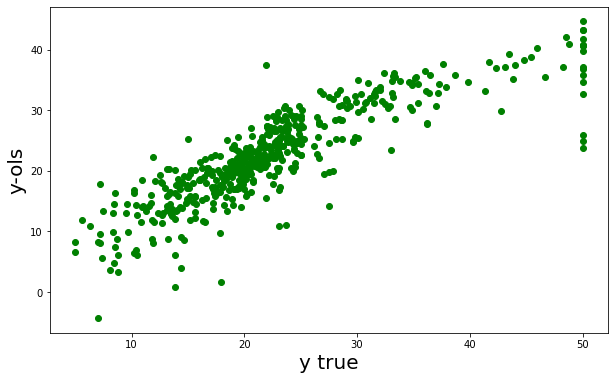

In [4]:
plt.figure(figsize = (10,6))
y_pred = linear_regression_model.predict(X)
plt.scatter(y,y_pred , color = 'green')
plt.xlabel('y true' , size = 20)
plt.ylabel('y-ols', size = 20)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
import statistics

mse_results_test={}
mse_results_train={}

for i in range(20):
    linear_regression_model = Ols()
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
    linear_regression_model.fit(x_train,y_train)
    mse_results_test[i] = linear_regression_model.score(x_test, y_test)
    mse_results_train[i] = linear_regression_model.score(x_train, y_train)
print('average mse test = %s' %(statistics.mean(mse_results_test.values())))
print('average mse train = %s' %(statistics.mean(mse_results_train.values())))
# mse_results

average mse test = 24.73131872300169
average mse train = 21.36217693220713


In [6]:
from scipy import stats
stats.ttest_rel(list(mse_results_train.values()), list(mse_results_test.values()))
# type(mse_results_train.values())

Ttest_relResult(statistic=-1.8745441320329552, pvalue=0.07631457877062328)

p-value = 0.21 ,  hence we can't reject the null hypothesis of identical mse

In [19]:
# Write a new class OlsGd which solves the problem using gradinet descent. 
# The class should get as a parameter the learning rate and number of iteration. 
# Plot the loss convergance. for each alpha, learning rate plot the MSE with respect to number of iterations.
# What is the effect of learning rate? 
# How would you find number of iteration automatically? 
# Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your feature first.
from sklearn.preprocessing import StandardScaler

class Normalizer():
    def __init__(self):
#         self.scaler = StandardScaler(with_mean=True, with_std=True)
        pass

    def fit(self, X):
#         self.scaler.fit(X)
        self.X = X
        self.max = np.max(self.X, axis=0)    
        self.min = np.min(self.X, axis=0)
        pass

    def predict(self, X):
        #apply normalization
#         return self.scaler.transform(X)
        return (self.X - self.min) / (self.max - self.min)
    
class OlsGd(Ols):
  
    def __init__(self, learning_rate=.05, 
               num_iteration=1000, 
               normalize=True,
               early_stop=True,
               alpha = 0.01,
               verbose=True):
    
        super(OlsGd, self).__init__()
        self.learning_rate = learning_rate
        self.num_iteration = num_iteration
        self.early_stop = early_stop
        self.normalize = normalize
        self.normalizer = Normalizer()    
        self.verbose = verbose
    
    def _fit(self, X, Y, reset=True, track_loss=True):
        #remeber to normalize the data before starting
        self.normalizer.fit(X)
        X = self.normalizer.predict(X)
#         self.w = np.zeros((X.shape[1], 1))
        self.w = np.zeros((X.shape[1]))
        self.costs = []

        for _ in range(self.num_iteration):
            self._step(X, Y)
#         print('w=', self.w)
#         print('w.shape = ', self.w.shape)
        self.final = self.w
    def _predict(self, X):
        #remeber to normalize the data before starting
        X = self.normalizer.predict(X)
#         return super().predict(X)
#         print('from _predict')
#         print('w=', self.w)
        return X.dot(self.final)
#         return X.dot(self.w)
      
    def _step(self, X, Y):
        # use w update for gradient descent
#         y_pred = X.dot(self.w)
#         cost_ = (1/X.shape[0])*(X.T@(y_pred - Y))
#         self.w = self.w - (self.learning_rate) * cost_

        prediction = np.dot(X, self.w)
        error = prediction - Y
        self.w = self.w - (self.learning_rate * (1/X.shape[0]) * np.dot(X.T, error))
        cost = 1/(2*X.shape[0]) * np.dot(error.T, error)
        self.costs.append(cost)
#         print('w=', self.w)
#         print('cost_ = ' , cost_)
#         print('y_pred = ' , y_pred)
    def costs(self):
        return self.costs

In [20]:
gradient_descent_model = OlsGd()
gradient_descent_model.fit(X,y)
mse = gradient_descent_model.score(X,y)
norm = Normalizer()
norm.fit(X)
x_norm = norm.predict(X)
mse_norm = gradient_descent_model.score(x_norm,y)
print('mse = %s' %(mse))
print('mse_norm = %s' %(mse_norm))
# np.zeros((X.shape[1]))

C:\Anaconda3\envs\py4dp\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

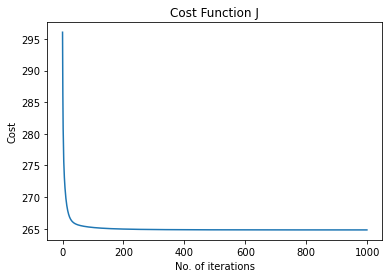

In [9]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(gradient_descent_model.costs)
plt.show()

## Exercise 2 - Ridge Linear Regression

Recall that ridge regression is identical to OLS but with a L2 penalty over the weights:

$L(y,\hat{y})=\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2$

where $y^{(i)}$ is the **true** value and $\hat{y}^{(i)}$ is the **predicted** value of the $i_{th}$ example, and $N$ is the number of examples

* Show, by differentiating the above loss, that the analytical solution is $w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$
* Change `OrdinaryLinearRegression` and `OrdinaryLinearRegressionGradientDescent` classes to work also for ridge regression (do not use the random noise analogy but use the analytical derivation). Either add a parameter, or use inheritance.
* **Bonus: Noise as a regularizer**: Show that OLS (ordinary least square), if one adds multiplicative noise to the features the **average** solution for $W$ is equivalent to Ridge regression. In other words, if $X'= X*G$ where $G$ is an uncorrelated noise with variance $\sigma$ and mean 1, then solving for $X'$ with OLS is like solving Ridge for $X$. What is the interpretation? 



In [10]:
class RidgeLs(Ols):
    def __init__(self, ridge_lambda, *wargs, **kwargs):
        super(RidgeLs,self).__init__(*wargs, **kwargs)
        self.ridge_lambda = ridge_lambda
    
    def _fit(self, X, Y):
        #Closed form of ridge regression
        m,n = X.shape
        I = np.eye((n))
        return (np.linalg.inv(X.T @ X + self.ridge_lambda * I) @ X.T @ Y)
#         return np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(Y)

In [12]:
ridge_linear_regression_model = RidgeLs(ridge_lambda = 10)
ridge_linear_regression_model.fit(X,y)
mse = ridge_linear_regression_model.score(X,y)
# gradient_descent_model.predict(X)
print('mse for Ridge linear regression = %s' %(mse))

mse for Ridge linear regression = 23.90709144330848


In [14]:
#Use scikitlearn implementation for OLS, Ridge and Lasso

### Answer
First we'll rewrite the Ridge regression formula to matrix notation and further break it down: <br>
$L=(y-Xw)^{T}(y-Xw)+\lambda w^{T}w=y^{T}y-2w^{T}X^{T}y+w^{T}(X^{T}X+\lambda I)w$ <br>
Now we derive by w and use matrix differentiation rule $\frac{\partial x^{T}Ax}{\partial x} =(A+A^{T})x=2Ax $   (assuming symetric matrix A): <br>
$\frac{\partial L}{\partial w} =-2X^{T}y+2(X^{T}X+\lambda I)=0$ <br>
$(X^{T}X+\lambda I)w=X^{T}y$ <br>
$\Rightarrow w_{ridge}=(X^{T}X+\lambda I)^{-1}X^{T}y$